In [134]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE
import seaborn as sns
import lyricsgenius
import re
import os
from sentence_transformers import SentenceTransformer
from transformers import pipeline
from dotenv import load_dotenv, find_dotenv

In [138]:
load_dotenv(find_dotenv())

False

In [136]:
dotenv_path = find_dotenv()

In [137]:
print(f"Loading from: {dotenv_path}")

Loading from: 


In [130]:
token = os.getenv("GENIUS_ACCESS_TOKEN")
print(token)

None


In [98]:
genius = lyricsgenius.Genius('2dYqSvUNCMoRboDR60nHLo7OsHqANk8BehiQ2WxExnKgqyBbLwdB-ePTjyxgRdsm')

# Cleaning Lyrics

In [99]:
def clean_lyrics(text):

    text = re.sub(r'^\d+\s+Contributors.*$', '', text, flags=re.MULTILINE)
    text = text.replace('—', ' — ').replace('–', ' – ')
    text = re.sub(r'\[(.*?)\]', '', text)
    text = re.sub(r'[^a-zA-Z\s\-]', '', text, flags=re.DOTALL)
    text = '\n'.join(re.sub(r'\s+', ' ', line).strip() for line in text.split('\n'))
    

    return text


def filter_and_split_lines(text, max_length=200):
    lines = text.split('\n')
    filtered_lines = [line for line in lines if len(line.strip()) <= max_length and line.strip() != '']
    return filtered_lines



def lyrics_preprocessing(song):
    text = clean_lyrics(song)
    lines = filter_and_split_lines(text)
    return lines

# Embedding

In [100]:
def embed_lyrics(lyrics, model = SentenceTransformer('all-MiniLM-L6-v2')):
    return model.encode(lyrics)

In [101]:
def plot_pca(embeddings, lyrics):
    pca = PCA(n_components = 2)
    reduced = pca.fit_transform(embeddings)

    plt.figure(figsize = (12, 8))
    plt.scatter(reduced[:, 0], reduced[:, 1], alpha = 0.7)

    for i, line in enumerate(lyrics[:50]):  # only label first 50 lines to avoid clutter
        short = line[:20] + "..." if len(line) > 20 else line
        plt.text(reduced[i, 0], reduced[i, 1], short, fontsize=8)

    plt.title("2D Visualization of BERT Embeddings for Lyric Lines")
    plt.xlabel("Component 1")
    plt.ylabel("Component 2")
    plt.tight_layout()
    plt.show()

In [120]:
def get_song_embeddings(song_title, artist_title, model = SentenceTransformer('all-MiniLM-L6-v2'), plot = False):

    song = genius.search_song(song_title, artist_title)
    
    cleaned_lyrics = lyrics_preprocessing(song.lyrics)

    embeddings = embed_lyrics(cleaned_lyrics, model)

    if plot:
        plot_pca(embeddings, cleaned_lyrics)

    return embeddings

    

    

    

Searching for "Gimmie Love" by Carly Rae Jepsen...


/Users/dominicbankovitch/Documents/Repos/music-sentiment/venv/lib/python3.13/site-packages/lyricsgenius/genius.py:468: FutureWarning: The constructor signature will change in a future version. It will change to Song(lyrics, body) instead of Song(client, json_dict, lyrics).
  song = Song(self, song_info, lyrics)


Done.


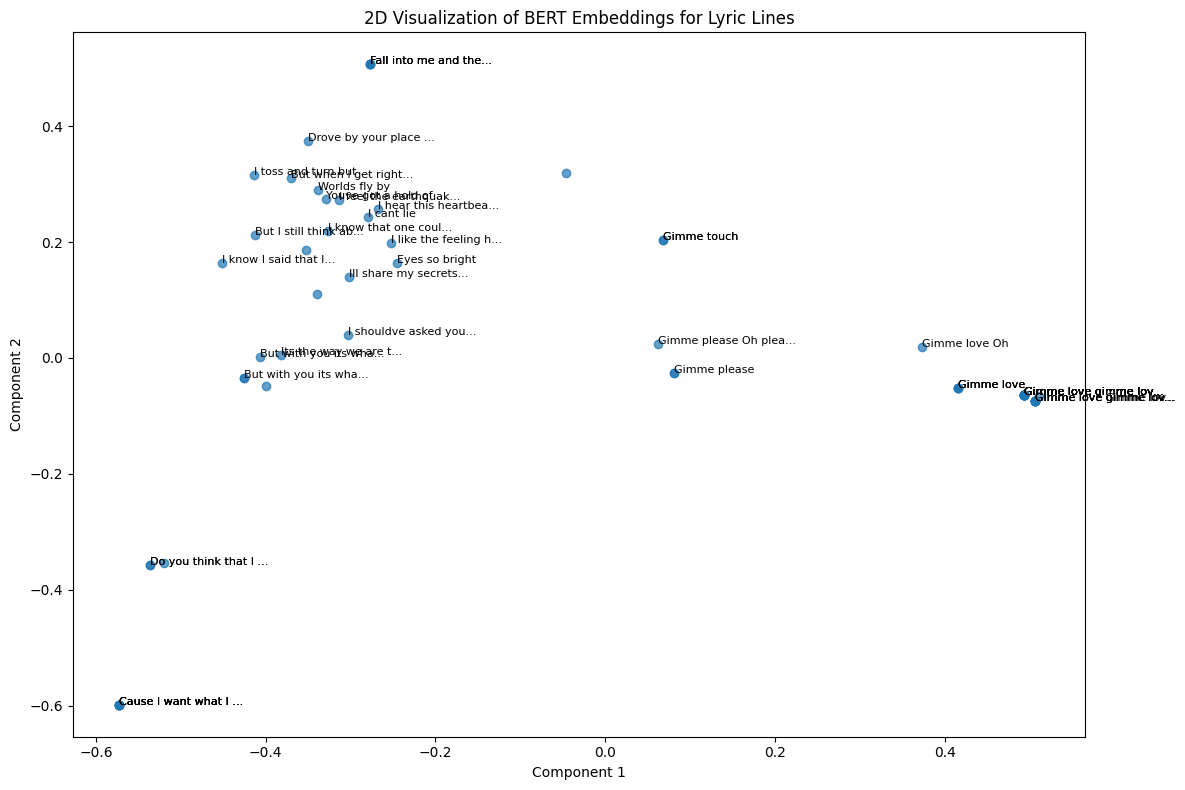

array([[ 0.0100012 ,  0.03782673, -0.01113926, ..., -0.04774974,
        -0.05145511, -0.02008223],
       [ 0.07707144, -0.02836613,  0.06773257, ...,  0.01006594,
        -0.11287327,  0.00309429],
       [ 0.02733279, -0.10476008, -0.00671428, ..., -0.04758084,
         0.04741507,  0.02751867],
       ...,
       [-0.15024568, -0.05348441,  0.1505635 , ...,  0.05488401,
         0.06109837, -0.09443926],
       [-0.1414654 , -0.06473948,  0.14274587, ...,  0.04665425,
         0.04798875, -0.10257532],
       [-0.15032502, -0.0441082 ,  0.15516394, ...,  0.05496313,
         0.06749087, -0.08183567]], shape=(69, 384), dtype=float32)

In [121]:
get_song_embeddings('Gimmie Love', 'Carly Rae Jepsen', plot = True)